# Travelling Salesman Problem solving algorithm run on points in .pdb format saved from images files

## Saving peaks in .pdb format

In [1]:
from peak_stats.reader.peaks import Image
from peak_stats.reader.read_peaks import Reader
from peak_stats.export_pdb.ascii_2_pdb import Points
from peak_stats.statistics.single_img_stats import GroupPeakStats

In [2]:
ascii_file="data/ascii_files/Run1-647_c123_sum_X5_processed_jsa_IDL_ASCII_image21.txt"

In [3]:
pdb_file = "data/example_image21/image21_group_peaks.pdb"

In [4]:
reader = Reader(ascii_file)
image = Image(reader)
img_peaks = Points(image=image)
group_peaks = GroupPeakStats(image=image)
img_peaks.save_pdb(filename=pdb_file, points=group_peaks.positions)

## Travelling Salesman Problem solver

Run the Greedy TSP Solver on set of points in 3D space to find the shortest path connecting all points.

In [5]:
from modeling_scripts.modeling_operations.create_structure import load_points, save_pdb
from modeling_scripts.modeling_operations.create_structure import run_image_tsp
from scipy.spatial.distance import squareform, pdist

In [6]:
tsp_pdb = pdb_file[:-4] + "_tsp.pdb"
in_points = load_points(infile=pdb_file)
graph = squareform(pdist(in_points))
arranged_points = run_image_tsp(graph=graph, points=in_points, endpoints=None, optimization_steps=10)
save_pdb(points=arranged_points, filename=tsp_pdb, connect=True)

File data/example_image21/image21_group_peaks_tsp.pdb saved...


'data/example_image21/image21_group_peaks_tsp.pdb'

## 2. Spline interpolation

Used to smooth the 3D structure and to have equal number of beads in each structure.

In [7]:
from modeling_scripts.smoothing_operations.spline import spline, refdist
from modeling_scripts.smoothing_operations.distance import distance3d as d

In [8]:
beads = 3400
out_smooth = tsp_pdb[:-4] + f'_smooth{beads}.pdb'
points = load_points(tsp_pdb)
ref_dist = refdist(points, beads)
new_points = spline(points, ref_dist, max_beads=beads)
save_pdb(new_points, out_smooth)

File data/example_image21/image21_group_peaks_tsp_smooth3400.pdb saved...


'data/example_image21/image21_group_peaks_tsp_smooth3400.pdb'

## 3. Distance maps

Save distance matrix in txt file and plot distances between model beads as a heatmap. 

In [9]:
from distance_maps.operations.heatmap_toolbox import distance_matrix, show
import numpy as np


#### 3D structure before interplation

In [10]:
heat_file = tsp_pdb[:-4] + ".heat"

In [11]:
distance_matrix(tsp_pdb, heat_file)


File data/example_image21/image21_group_peaks_tsp.heat saved...


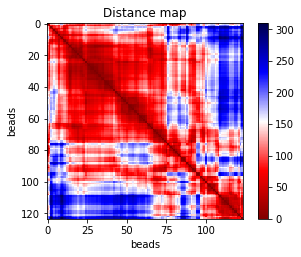

In [12]:
cmap = "seismic_r"
heatmap = np.loadtxt(heat_file)
image_outfile = f"{heat_file[:-5]}_{cmap}.png"
title = 'Distance map'
show(heatmap, gamma=1, out_file_name=image_outfile, title=title, cmap=cmap, show_map=True)

#### 3D structure after interpolation

In [13]:
heat_file_smooth = out_smooth[:-4] + ".heat"

In [14]:
distance_matrix(out_smooth, heat_file_smooth)


File data/example_image21/image21_group_peaks_tsp_smooth3400.heat saved...


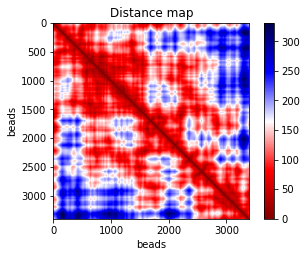

In [15]:
heatmap = np.loadtxt(heat_file_smooth)
image_outfile = f"{heat_file_smooth[:-5]}_{cmap}.png"
title = 'Distance map'
show(heatmap, gamma=1, out_file_name=image_outfile, title=title, cmap=cmap, show_map=True)